In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
!ls results

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
GENETIC_REULSTS = "./results/genetic_solver_results.csv"
HILL_CLIMBING = "./results/hill_climbing_solver_results.csv"
SIMULATED_ANN = "./results/simulated_annealing2.csv"

In [4]:
res = pd.read_csv(GENETIC_REULSTS)
res["solver"] = "genetic"

res2 = pd.read_csv(HILL_CLIMBING)
res2["solver"] = "hill_climbing"
res = res.append(res2)

res3 = pd.read_csv(SIMULATED_ANN)
res3["solver"] = "sa"

res = res.append(res3)
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,error,is_solved,solver
0,1,./A_set/A_,9,18,10,0,17,25.00,0.010,0.85,15,1507.970,1,genetic
1,1,./A_set/A_,7,36,9,3,17,25.00,0.010,0.85,15,2277.970,1,genetic
2,1,./A_set/A_,12,54,10,0,53,25.00,0.010,0.85,15,800.996,1,genetic
3,1,./A_set/A_,10,108,9,40,53,25.00,0.010,0.85,15,3019.960,1,genetic
4,1,./A_set/A_,8,18,9,4,17,25.00,0.010,0.85,15,745.575,1,genetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15625,11,./B_set_rounded/B_,14,297,9,207,191,0.02,0.015,1600.00,15,12699.000,1,sa
15626,12,./B_set_rounded/B_,14,297,9,207,191,0.02,0.015,1600.00,15,12699.000,1,sa
15627,13,./B_set_rounded/B_,14,297,9,207,191,0.02,0.015,1600.00,15,12699.000,1,sa
15628,14,./B_set_rounded/B_,14,297,9,207,191,0.02,0.015,1600.00,15,12699.000,1,sa


In [5]:
res.loc[res["base_path"] == "./A_set/A_", "base_path"] = "A"
res.loc[res["base_path"] != "A", "base_path"] = "B"
res["FILE"] = res["base_path"]+res["instance"].astype(str)
res = res[res["FILE"] != "B15"]
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,error,is_solved,solver,FILE
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1507.970,1,genetic,A9
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,2277.970,1,genetic,A7
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,800.996,1,genetic,A12
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,3019.960,1,genetic,A10
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,745.575,1,genetic,A8


### Algorithms solved statistics

In [6]:
for solver in res.solver.unique():
    print(f'======={solver}==========')
    res_count = res[(res.solver == solver) & (res.minute == 15)]
    print(f'Percentage of solved runs: {res_count.is_solved.value_counts(normalize=True)[1]}')
    print(f'Percentage of solved runs for A set (easy files): {res_count[res_count.base_path == "A"].is_solved.value_counts(normalize=True)[1]}')
    print(f'Percentage of solved runs for B set (hard files): {res_count[res_count.base_path == "B"].is_solved.value_counts(normalize=True)[1]}')
    print(f'Count of A set instances for which solution exists {len(res_count[(res_count.base_path == "A") & (res_count.is_solved == 1)].FILE.unique())}')
    print(f'Count of B set instances for which solution exists {len(res_count[(res_count.base_path == "B") & (res_count.is_solved == 1)].FILE.unique())}')

=======genetic==========
Percentage of solved runs: 0.5635775862068966
Percentage of solved runs for A set (easy files): 0.9270833333333334
Percentage of solved runs for B set (hard files): 0.17410714285714285
Count of A set instances for which solution exists 14
Count of B set instances for which solution exists 3
=======hill_climbing==========
Percentage of solved runs: 0.6491372226787182
Percentage of solved runs for A set (easy files): 0.9571428571428572
Percentage of solved runs for B set (hard files): 0.3185689948892675
Count of A set instances for which solution exists 15
Count of B set instances for which solution exists 9
=======sa==========
Percentage of solved runs: 0.6216748768472906
Percentage of solved runs for A set (easy files): 0.939047619047619
Percentage of solved runs for B set (hard files): 0.2816326530612245
Count of A set instances for which solution exists 15
Count of B set instances for which solution exists 4


### first clean the dirty generated csv file

In [7]:
INF = 99999
res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)

res["constraint_error"] = res["constraint_error"].apply(lambda x: min(x, 1000))
res["config"] = res["population_size"].astype(str) + " " + res["mutation_rate"].astype(str) + " " + res["crossover_rate"].astype(str) + " " + res["minute"].astype(str)

res = res.drop(labels=["score", "error"], axis=1, errors="ignore")
res

<ipython-input-7-596f8b14e7aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["schedule_error"] = res.apply(lambda x: x["error"] if x["is_solved"] else INF, axis=1)
<ipython-input-7-596f8b14e7aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["constraint_error"] = res.apply(lambda x: x["error"] if not x["is_solved"] else 0, axis=1)
<ipython-input-7-596f8b14e7aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config
0,1,A,9,18,10,0,17,25.00,0.010,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1
1,1,A,7,36,9,3,17,25.00,0.010,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1
2,1,A,12,54,10,0,53,25.00,0.010,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1
3,1,A,10,108,9,40,53,25.00,0.010,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1
4,1,A,8,18,9,4,17,25.00,0.010,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15625,11,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 11
15626,12,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 12
15627,13,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 13
15628,14,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 14


In [8]:
res["constraint_error"] = res["constraint_error"].apply(lambda x: min(x, 1000))
res["config"] = res["population_size"].astype(str) + " " + res["mutation_rate"].astype(str) + " " + res["crossover_rate"].astype(str) + " " + res["minute"].astype(str)
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1


In [9]:
res['config_full'] = res['config'] + '_' + res['FILE']
res.head()

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full
0,1,A,9,18,10,0,17,25.0,0.01,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9
1,1,A,7,36,9,3,17,25.0,0.01,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7
2,1,A,12,54,10,0,53,25.0,0.01,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12
3,1,A,10,108,9,40,53,25.0,0.01,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10
4,1,A,8,18,9,4,17,25.0,0.01,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8


In [10]:
for ind in res.index:
    row = res.iloc[ind]
    if row['solver'] != 'sa' or row.minute == 1:
        continue
    
    solved = row['is_solved']
    if not row['is_solved'] and len(res[(res.config_full == row.config_full) & (res.minute < row.minute) & (res.is_solved)]) != 0:
        res.loc[ind, 'is_solved'] = 1
        res.loc[ind, 'constraint_error'] = 0
        solved = True

    if solved:
        res.loc[ind, 'schedule_error'] = res[(res.config_full == row.config_full) & (res.minute < row.minute) & (res.is_solved)].schedule_error.min()
        if pd.isna(res.iloc[ind]['schedule_error']):
            res.loc[ind, 'schedule_error'] = row['schedule_error']
    else:
        res.loc[ind, 'constraint_error'] = res[(res.config_full == row.config_full) & (res.minute < row.minute) & (~res.is_solved)].constraint_error.min()
        if pd.isna(res.iloc[ind]['constraint_error']):
            res.loc[ind, 'constraint_error'] = row['constraint_error']

In [11]:
files_solved = res[res.is_solved == 1].groupby('config').aggregate({'FILE': list, 'is_solved': 'sum'}).rename(columns={'FILE': 'files_solved', 'is_solved': 'solved_number'})
files_solved

,files_solved,solved_number
config,,
0.0025 0.0025 -1.0 1,"[A9, A7, A12, A8, A10, A3, A1, A14, A13, A6, A...",17
0.0025 0.0025 -1.0 10,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",19
0.0025 0.0025 -1.0 11,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",19
0.0025 0.0025 -1.0 12,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20
0.0025 0.0025 -1.0 13,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",20
...,...,...
50.0 0.07 1.0 5,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16
50.0 0.07 1.0 6,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16
50.0 0.07 1.0 7,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",16


In [12]:
res = res.merge(files_solved, how='left', on='config')
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,time_limit,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full,files_solved,solved_number
0,1,A,9,18,10,0,17,25.00,0.010,0.85,15,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
1,1,A,7,36,9,3,17,25.00,0.010,0.85,15,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
2,1,A,12,54,10,0,53,25.00,0.010,0.85,15,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
3,1,A,10,108,9,40,53,25.00,0.010,0.85,15,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
4,1,A,8,18,9,4,17,25.00,0.010,0.85,15,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47401,11,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 11,0.02 0.015 1600.0 11_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18
47402,12,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 12,0.02 0.015 1600.0 12_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18
47403,13,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 13,0.02 0.015 1600.0 13_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18
47404,14,B,14,297,9,207,191,0.02,0.015,1600.00,15,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 14,0.02 0.015 1600.0 14_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18


how many times each instance was solved:

In [13]:
files_solved_count = res[(res.minute == 15) & (res.is_solved == 1)].FILE.value_counts()
files_solved_count = 1 / files_solved_count
files_solved_count /= files_solved_count.sum()
files_solved_count = files_solved_count.rename('file_weight')
files_solved_count

A12    0.006150
A10    0.006150
A7     0.006150
A3     0.006150
A9     0.006150
A2     0.006150
A1     0.006150
B8     0.006150
A13    0.006150
A8     0.006150
A5     0.006150
A11    0.006150
A14    0.006207
A6     0.006207
A15    0.006207
B14    0.006324
B4     0.007208
B13    0.010474
A4     0.037242
B6     0.041897
B11    0.134072
B9     0.167590
B7     0.167590
B5     0.335180
Name: file_weight, dtype: float64

In [14]:
res = res.merge(files_solved_count, left_on = 'FILE', right_index=True, how='left')

In [15]:
res.file_weight = res.file_weight * res.is_solved
res

,minute,base_path,instance,intervention_size,resources_size,exclusion_size,scenarious_size,population_size,mutation_rate,crossover_rate,...,is_solved,solver,FILE,schedule_error,constraint_error,config,config_full,files_solved,solved_number,file_weight
0,1,A,9,18,10,0,17,25.00,0.010,0.85,...,1,genetic,A9,1507.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A9,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.006150
1,1,A,7,36,9,3,17,25.00,0.010,0.85,...,1,genetic,A7,2277.970,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A7,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.006150
2,1,A,12,54,10,0,53,25.00,0.010,0.85,...,1,genetic,A12,800.996,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A12,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.006150
3,1,A,10,108,9,40,53,25.00,0.010,0.85,...,1,genetic,A10,3019.960,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A10,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.006150
4,1,A,8,18,9,4,17,25.00,0.010,0.85,...,1,genetic,A8,745.575,0.0,25.0 0.01 0.85 1,25.0 0.01 0.85 1_A8,"[A9, A7, A12, A10, A8, A3, A1, A13, A11, A2, A...",15,0.006150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47401,11,B,14,297,9,207,191,0.02,0.015,1600.00,...,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 11,0.02 0.015 1600.0 11_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18,0.006324
47402,12,B,14,297,9,207,191,0.02,0.015,1600.00,...,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 12,0.02 0.015 1600.0 12_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18,0.006324
47403,13,B,14,297,9,207,191,0.02,0.015,1600.00,...,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 13,0.02 0.015 1600.0 13_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18,0.006324
47404,14,B,14,297,9,207,191,0.02,0.015,1600.00,...,1,sa,B14,12699.000,0.0,0.02 0.015 1600.0 14,0.02 0.015 1600.0 14_B14,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",18,0.006324


### Error from parameter dependence

======genetic algorithm==========
<ipython-input-17-3ec600785157>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genetic_grouped["is_solved"] -= genetic_grouped["is_solved"].mean()
<ipython-input-17-3ec600785157>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genetic_grouped["schedule_error"] -= genetic_grouped["schedule_error"].mean()


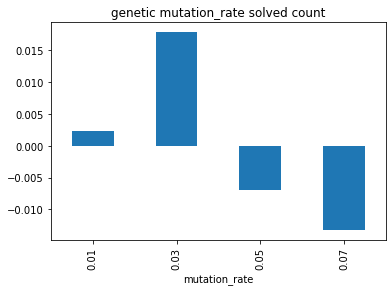

<Figure size 432x288 with 0 Axes>

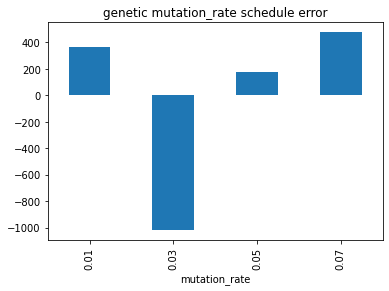

<Figure size 432x288 with 0 Axes>

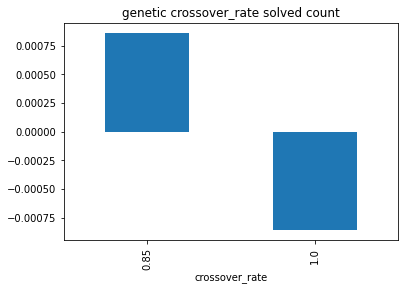

<Figure size 432x288 with 0 Axes>

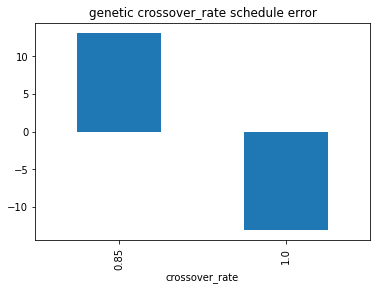

<Figure size 432x288 with 0 Axes>

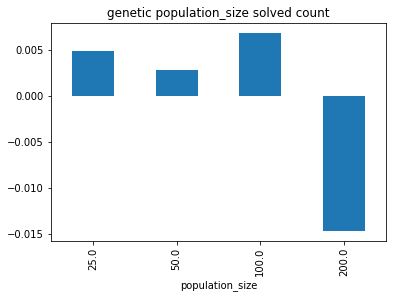

<Figure size 432x288 with 0 Axes>

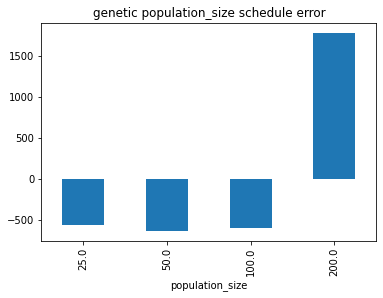

<Figure size 432x288 with 0 Axes>

======hill_climbing algorithm==========


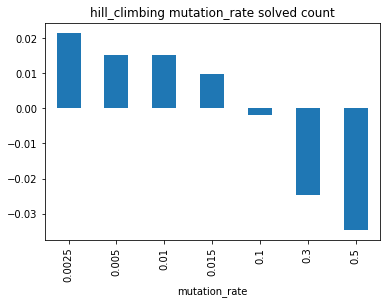

<Figure size 432x288 with 0 Axes>

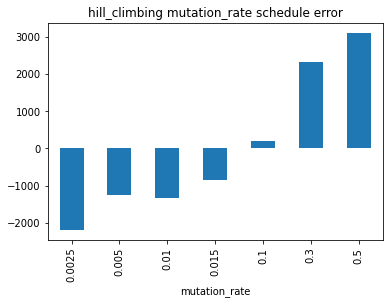

<Figure size 432x288 with 0 Axes>

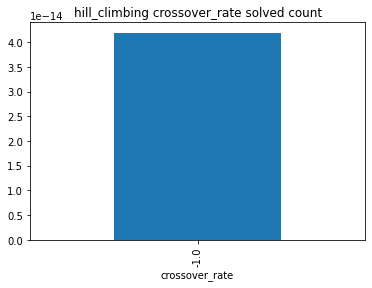

<Figure size 432x288 with 0 Axes>

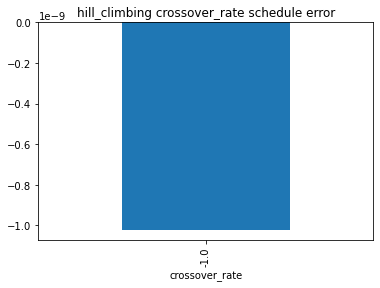

<Figure size 432x288 with 0 Axes>

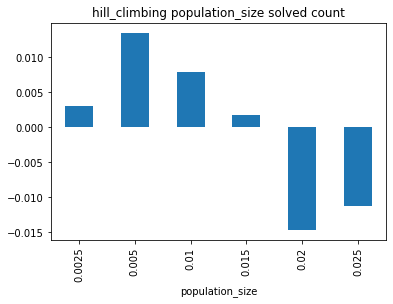

<Figure size 432x288 with 0 Axes>

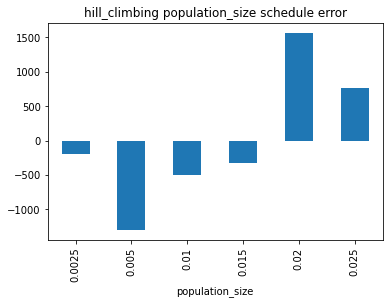

<Figure size 432x288 with 0 Axes>

======sa algorithm==========


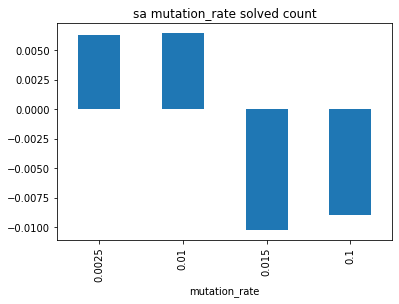

<Figure size 432x288 with 0 Axes>

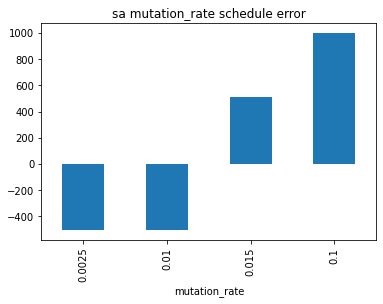

<Figure size 432x288 with 0 Axes>

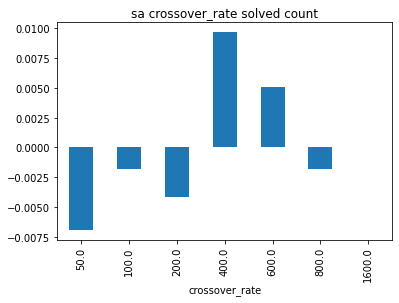

<Figure size 432x288 with 0 Axes>

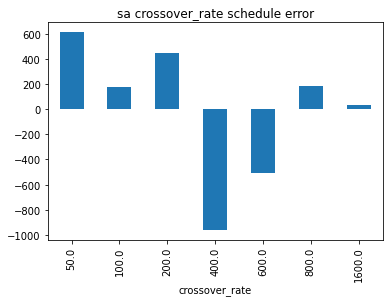

<Figure size 432x288 with 0 Axes>

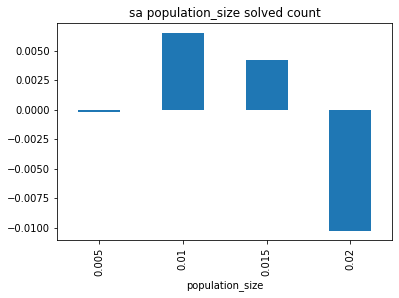

<Figure size 432x288 with 0 Axes>

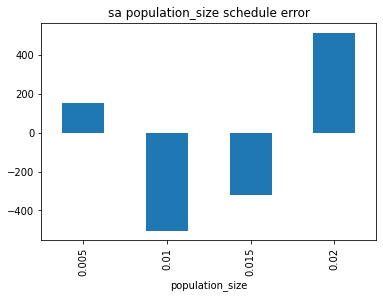

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt 

for solver in res.solver.unique():
    print(f"======{solver} algorithm==========")
    genetic_grouped = res[res.solver == solver]
    genetic_grouped["is_solved"] -= genetic_grouped["is_solved"].mean()
    genetic_grouped["schedule_error"] -= genetic_grouped["schedule_error"].mean()
    

    for param in ["mutation_rate", "crossover_rate", "population_size"]:
        genetic_grouped.groupby(by=param).mean().is_solved.plot.bar(title=f"{solver} {param} solved count")
        plt.figure()
        plt.show()

        genetic_grouped.groupby(by=param).mean().schedule_error.plot.bar(title=f"{solver} {param} schedule error")
        plt.figure()
        plt.show()
        print('=============')

### Set of files which in the end was solved by each solver and configuration

In [18]:
fset = set(res[res.minute == 15].FILE.unique())
for file_arr in res[res.minute == 15].files_solved:
    fset = fset & set(file_arr)
fset 

{'A1', 'A10', 'A11', 'A12', 'A13', 'A2', 'A3', 'A5', 'A7', 'A8', 'A9', 'B8'}

In [19]:
pd.set_option("display.min_rows", 100)
pd.set_option("display.max_rows", 200)

In [20]:
res[(res["is_solved"]) & (res["base_path"] == "B")].FILE.unique()

array(['B8', 'B13', 'B14', 'B4', 'B6', 'B5', 'B11', 'B7', 'B9'],
      dtype=object)

## get best configurations

In [21]:
agg = {}

def err_mean(error):
    arr = error.to_numpy()
    return -arr[arr != INF].mean()

agg["constraint_error"] = err_mean
agg["schedule_error"] = err_mean
agg["is_solved"] = "sum"
agg["solver"] = "first"

agg["FILE"] = "count"
agg["file_weight"] = "sum"
agg["files_solved"] = "first"

temp = res[res["minute"] == 15]
temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)
agg["Set_schedule_error"] = "mean"

grouped = temp.groupby(temp["config"]).aggregate(agg)
grouped = grouped.sort_values(by=["file_weight", "schedule_error"], ascending=False)
grouped["schedule_error"] *= -1
grouped = grouped.drop(columns=["constraint_error", "FILE"]).rename(columns={"is_solved": "solved_files_ratio", "file_weight": "solved_files_weight"})
grouped[["Set_schedule_error", "schedule_error", "solver"]]

<ipython-input-21-9c89f13d827a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Set_schedule_error"] = temp["schedule_error"] * temp["FILE"].isin(fset)


,Set_schedule_error,schedule_error,solver
config,,,
0.005 0.0025 -1.0 15,998.554069,4800.937762,hill_climbing
0.0025 0.01 -1.0 15,998.522276,6810.974714,hill_climbing
0.015 0.0025 -1.0 15,995.741517,5099.289000,hill_climbing
0.015 0.005 -1.0 15,995.756724,5091.872286,hill_climbing
0.01 0.01 -1.0 15,998.524690,7125.088524,hill_climbing
0.015 0.015 -1.0 15,920.562517,5049.908050,hill_climbing
0.005 0.1 -1.0 15,1101.025552,5050.764650,hill_climbing
0.01 0.1 -1.0 15,1100.980379,7723.895350,hill_climbing
0.02 0.015 -1.0 15,924.326552,5184.859947,hill_climbing


top hc confs

In [22]:
grouped[grouped["solver"] == "hill_climbing"].head(5)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
0.005 0.0025 -1.0 15,4800.937762,21,hill_climbing,0.530748,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",998.554069
0.0025 0.01 -1.0 15,6810.974714,21,hill_climbing,0.530748,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",998.522276
0.015 0.0025 -1.0 15,5099.289000,21,hill_climbing,0.459988,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",995.741517
0.015 0.005 -1.0 15,5091.872286,21,hill_climbing,0.363158,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",995.756724
0.01 0.01 -1.0 15,7125.088524,21,hill_climbing,0.363158,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",998.524690


In [23]:
grouped[grouped["solver"] == "genetic"].head(5)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
25.0 0.01 1.0 15,4947.387706,17,genetic,0.105954,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",929.154586
50.0 0.01 1.0 15,4971.480706,17,genetic,0.105954,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",923.560345
50.0 0.01 0.85 15,5016.089941,17,genetic,0.105954,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",933.333207
25.0 0.03 1.0 15,5024.996412,17,genetic,0.105954,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",916.368552
50.0 0.03 0.85 15,5030.736824,17,genetic,0.105954,"[A9, A7, A12, A8, A10, A3, A1, A14, A11, A13, ...",926.757586


In [24]:
grouped[grouped["solver"] == "sa"].head(5)

,schedule_error,solved_files_ratio,solver,solved_files_weight,files_solved,Set_schedule_error
config,,,,,,
0.005 0.0025 400.0 15,4947.530789,19,sa,0.153671,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.774828
0.01 0.01 400.0 15,4971.413158,19,sa,0.153671,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.055000
0.005 0.0025 600.0 15,5356.200421,19,sa,0.153671,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",939.606414
0.005 0.0025 1600.0 15,5000.163000,18,sa,0.116429,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",929.508690
0.005 0.0025 200.0 15,5008.855944,18,sa,0.116429,"[A9, A7, A12, A8, A10, A3, A1, A11, A6, A2, B8...",933.223345


In [25]:
grouped.sort_values(by = ["Set_schedule_error", "solved_files_ratio"], ascending=[True, False])[["solved_files_ratio", "Set_schedule_error", "solver"]]

,solved_files_ratio,Set_schedule_error,solver
config,,,
0.015 0.1 -1.0 15,19,906.983828,hill_climbing
0.025 0.005 -1.0 15,18,910.804897,hill_climbing
0.025 0.0025 -1.0 15,18,910.875655,hill_climbing
0.025 0.01 -1.0 15,18,910.993276,hill_climbing
25.0 0.01 0.85 15,15,913.571897,genetic
25.0 0.03 1.0 15,17,916.368552,genetic
0.015 0.015 -1.0 15,20,920.562517,hill_climbing
0.015 0.3 -1.0 15,17,921.175552,hill_climbing
0.01 0.3 -1.0 15,17,922.199897,hill_climbing


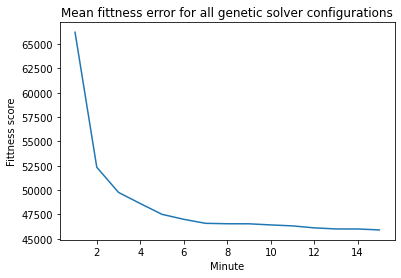

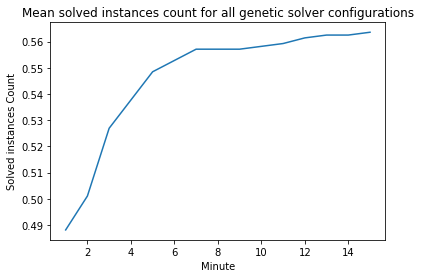

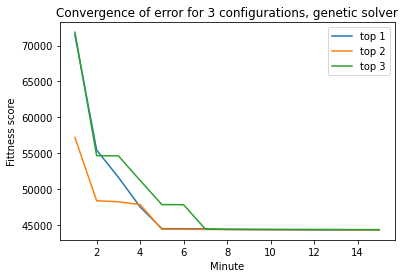

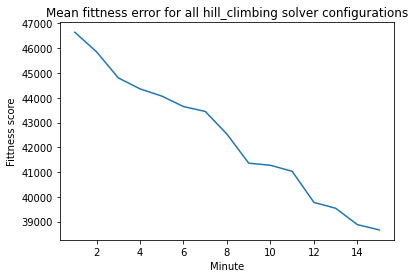

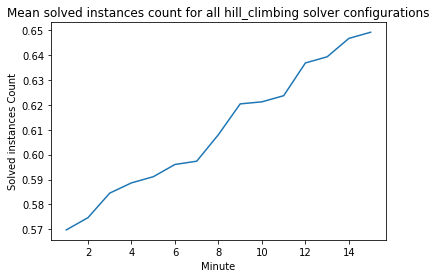

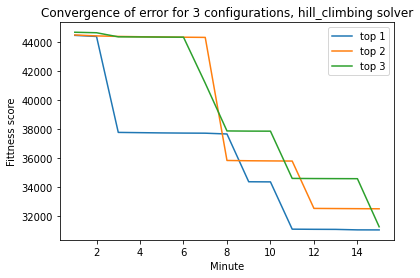

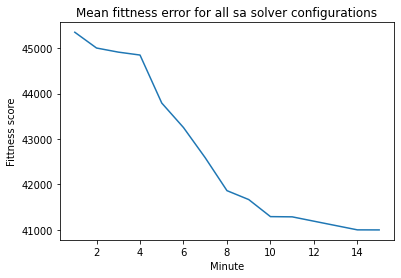

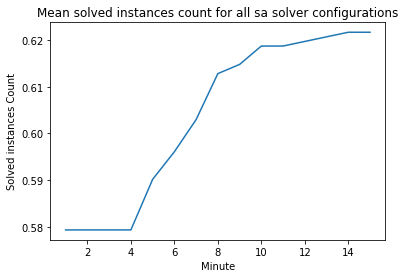

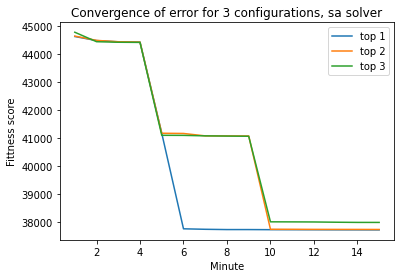

In [26]:
import matplotlib.pyplot as plt

for solver in res.solver.unique():
    cur_solver = res[res.solver == solver]

    gf = cur_solver.groupby(by="minute").mean()
    plt.plot(gf.index.tolist(), gf["schedule_error"])
    plt.title(f"Mean fittness error for all {solver} solver configurations")
    plt.xlabel('Minute')
    plt.ylabel('Fittness score')
    plt.show()


    plt.plot(gf.index.tolist(), gf["is_solved"])
    plt.title(f"Mean solved instances count for all {solver} solver configurations")
    plt.xlabel('Minute')
    plt.ylabel('Solved instances Count')
    plt.show()

    for ind, conf in enumerate(grouped[(grouped.solver == solver)].index[:3]):
        gf = cur_solver[cur_solver.config.str.startswith(conf[:-2])].groupby(by="minute").mean()
        plt.plot(gf.index.tolist(), gf["schedule_error"])
    
    plt.xlabel('Minute')
    plt.ylabel('Fittness score')
    plt.legend([f'top {x+1}' for x in list(range(3))])
    plt.title(f"Convergence of error for 3 configurations, {solver} solver")
    plt.show()


### Training Decision Tree

In [32]:
best_solver_df = []
res = res.sort_values(by=["base_path", "instance"])

for instance_file in res.FILE.unique():
    cur_file_df = res[res.FILE == instance_file]
    
    solved_df = cur_file_df[cur_file_df.is_solved == 1].sort_values(by="schedule_error")
    if len(solved_df) == 0:
        solved_df = cur_file_df[cur_file_df.is_solved == 0].sort_values(by="constraint_error")
    
    best_solver_df.append([instance_file, solved_df.iloc[0].solver])

best_solver_df = pd.DataFrame(best_solver_df, columns=["FILE", "Best_Solver"])
#best_solver_df.set_index("FILE", drop=True, inplace=True)
best_solver_df = best_solver_df.merge(res[["FILE", "intervention_size", "resources_size", "scenarious_size"]], left_on="FILE", right_on="FILE", how="left").groupby("FILE").first()

In [33]:
from sklearn.preprocessing import LabelEncoder

best_solver_df["Best_Solver_enc"] = LabelEncoder().fit_transform(best_solver_df["Best_Solver"])
best_solver_df

,Best_Solver,intervention_size,resources_size,scenarious_size,Best_Solver_enc
FILE,,,,,
A1,hill_climbing,181,9,90,1
A10,hill_climbing,108,9,53,1
A11,genetic,54,9,53,0
A12,genetic,54,10,53,0
A13,hill_climbing,179,9,90,1
A14,genetic,108,10,53,0
A15,genetic,108,10,53,0
A2,hill_climbing,89,9,90,1
A3,hill_climbing,91,10,90,1


In [40]:
best_solver_df.Best_Solver.value_counts()

hill_climbing    23
genetic           4
sa                2
Name: Best_Solver, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as TreeModule

X = best_solver_df[["intervention_size", "resources_size", "scenarious_size"]]
Y = best_solver_df["Best_Solver_enc"]

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

[Text(167.40000000000003, 190.26, 'interventions_size <= 71.5\n29\n[4, 23, 2]\nHC'),
 Text(100.44000000000001, 135.9, 'scenarious_size <= 35.0\n5\n[2, 1, 2]\nSA'),
 Text(66.96000000000001, 81.53999999999999, 'resources_size <= 9.5\n3\n[0, 1, 2]\nGENETIC'),
 Text(33.480000000000004, 27.180000000000007, '2\n[0, 0, 2]\nGENETIC'),
 Text(100.44000000000001, 27.180000000000007, '1\n[0, 1, 0]\nHC'),
 Text(133.92000000000002, 81.53999999999999, '2\n[2, 0, 0]\nSA'),
 Text(234.36, 135.9, 'resources_size <= 9.5\n24\n[2, 22, 0]\nHC'),
 Text(200.88000000000002, 81.53999999999999, '20\n[0, 20, 0]\nHC'),
 Text(267.84000000000003, 81.53999999999999, 'scenarious_size <= 71.5\n4\n[2, 2, 0]\nSA'),
 Text(234.36, 27.180000000000007, '2\n[2, 0, 0]\nSA'),
 Text(301.32000000000005, 27.180000000000007, '2\n[0, 2, 0]\nHC')]

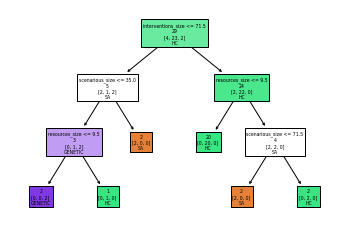

In [39]:
TreeModule.plot_tree(tree, feature_names=["interventions_size", "resources_size", "scenarious_size"], class_names=["SA", "HC", "GENETIC"], label=None, impurity=False, filled = True)

In [37]:
from sklearn.metrics import f1_score

f1_score(Y, tree.predict(X), average='weighted')

1.0